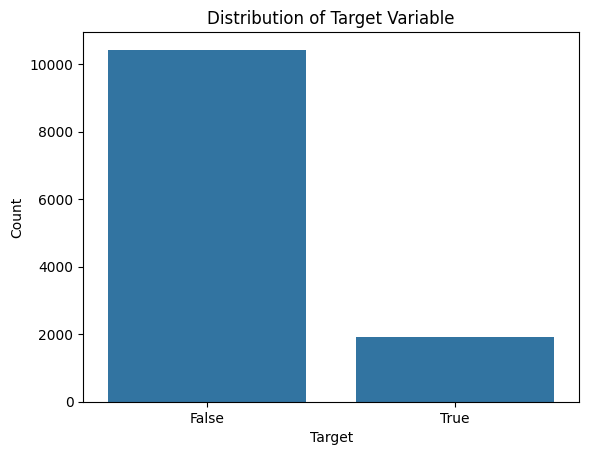

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Dataset.csv')

# Plotting the distribution of the Target variable
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

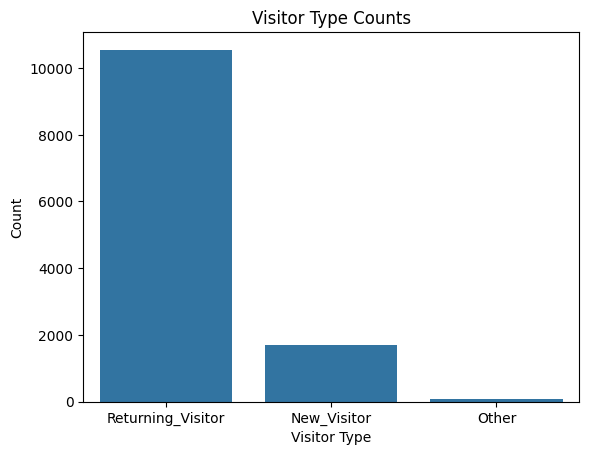

In [6]:
# Analyzing patterns based on Visitor Type
visitor_type_counts = data['VisitorType'].value_counts()
sns.barplot(x=visitor_type_counts.index, y=visitor_type_counts.values)
plt.title('Visitor Type Counts')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

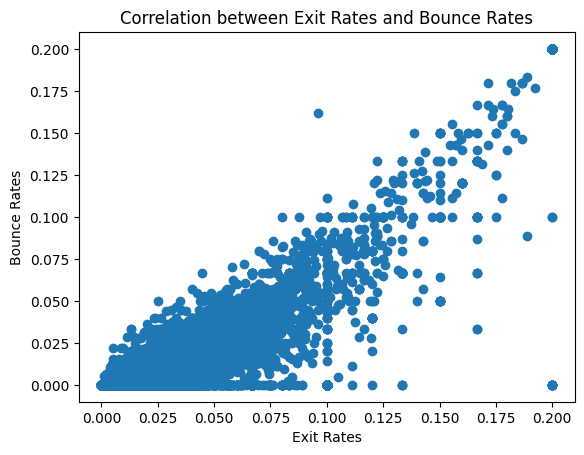

Correlation between Exit Rates and Bounce Rates: 0.9130043961815212


In [7]:
# Scatter plot for Exit Rates vs Bounce Rates
plt.scatter(data['ExitRates'], data['BounceRates'])
plt.title('Correlation between Exit Rates and Bounce Rates')
plt.xlabel('Exit Rates')
plt.ylabel('Bounce Rates')
plt.show()

# Calculating correlation coefficient
correlation = data['ExitRates'].corr(data['BounceRates'])
print(f'Correlation between Exit Rates and Bounce Rates: {correlation}')

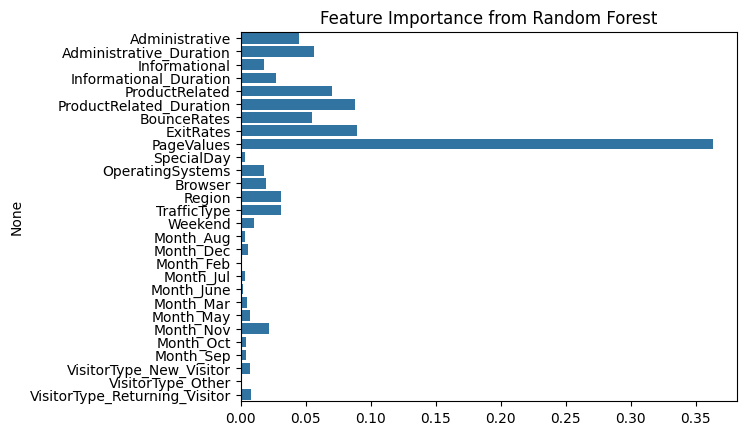

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Preparing data for modeling
X = data.drop(columns=['Target'])
y = data['Target']

# Encoding categorical variables if necessary
X = pd.get_dummies(X)

# Fitting Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Getting feature importance
importance = model.feature_importances_
features = X.columns

# Plotting feature importance
sns.barplot(x=importance, y=features)
plt.title('Feature Importance from Random Forest')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Example models to compare: Logistic Regression, Random Forest, and Decision Tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'{model_name} Accuracy: {accuracy_score(y_test, predictions)}')
    print(classification_report(y_test, predictions))

c:\Users\rushi\.conda\envs\tensorflowEnv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8917274939172749
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2115
        True       0.72      0.40      0.51       351

    accuracy                           0.89      2466
   macro avg       0.81      0.69      0.72      2466
weighted avg       0.88      0.89      0.88      2466

Random Forest Accuracy: 0.9099756690997567
              precision    recall  f1-score   support

       False       0.93      0.97      0.95      2115
        True       0.73      0.58      0.65       351

    accuracy                           0.91      2466
   macro avg       0.83      0.77      0.80      2466
weighted avg       0.90      0.91      0.91      2466

Decision Tree Accuracy: 0.8706407137064072
              precision    recall  f1-score   support

       False       0.93      0.92      0.92      2115
        True       0.54      0.59      0.57       351

    accuracy                           0.87    